In [1]:
import os
from google.cloud import bigquery
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/Rebecca/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Data Import: Combined_broadband_deployment_rate_and_demographic_info

In [3]:
%%bigquery data
SELECT *
FROM `broadband-data.CountyInfo.Combined_broadband_deployment_rate_and_demographic_info`

Downloading: 100%|███████████████████████| 2833/2833 [00:05<00:00, 534.74rows/s]


In [4]:
data.head()

,Broadband_Deployment_rate,County_code,State_name,County_name,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,...,Race_american_indian_alaska_native_ratio,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio
0,0.757470,10001,Delaware,Kent County,272.386051,185.379579,75.058556,0.711799,0.288201,0.481055,...,0.005865,0.000461,0.070196,0.129859,0.799945,0.069790,0.716761,0.213448,0.721942,0.278058
1,0.750557,10003,Delaware,New Castle County,1256.203521,1142.270735,58.769825,0.951068,0.048932,0.481812,...,0.001889,0.000197,0.044935,0.194047,0.761019,0.053262,0.783376,0.163363,0.696636,0.303364
2,0.861779,10005,Delaware,Sussex County,182.642141,27.253834,90.256433,0.231927,0.768073,0.488800,...,0.004872,0.000322,0.077653,0.139605,0.782742,0.074750,0.695321,0.229929,0.775115,0.224885
3,0.696424,12001,Florida,Alachua County,277.551884,209.454005,59.938254,0.777506,0.222494,0.485377,...,0.002528,0.000502,0.036931,0.206484,0.756585,0.093491,0.754414,0.152095,0.544868,0.455132
4,0.607850,12005,Florida,Bay County,222.625086,188.240894,26.714694,0.875720,0.124280,0.495440,...,0.006291,0.000853,0.055860,0.131701,0.812439,0.142109,0.645708,0.212182,0.631331,0.368669


In [9]:
data.columns

Index(['Broadband_Deployment_rate', 'County_code', 'State_name', 'County_name',
       'Population_density', 'Urban_density', 'Rural_density', 'Urban_ratio',
       'Rural_ratio', 'Male_ratio', 'Female_ratio', 'Age_under_5_ratio',
       'Age_between_5_and_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_between_25_and_44_ratio', 'Age_between_45_and_64_ratio',
       'Age_above_65_ratio', 'Race_hispanic_ratio', 'Race_white_ratio',
       'Race_black_ratio', 'Race_asian_ratio',
       'Race_american_indian_alaska_native_ratio',
       'Race_native_hawaii_and_other_pacific_island_ratio',
       'Degree_not_high_school_ratio', 'Degree_college_ratio',
       'Degree_university_ratio', 'Insurance_none_ratio',
       'Insurance_equal_1_ratio', 'Insurance_equal_above_2_ratio',
       'Status_own_ratio', 'Status_rant_ratio'],
      dtype='object')

In [34]:
data['Gender ratio difference'] = data['Male_ratio']-data['Female_ratio']

In [35]:
print(len(data))
print(data.State_name.nunique())
print(data.County_name.nunique())
print(data.County_code.nunique())

2833
45
1697
2816


###  State Level

#### 1. Summary

In [36]:
data_state = data.groupby("State_name").mean()
data_state = data_state.sort_values('Broadband_Deployment_rate',ascending=False)
data_state = data_state.reset_index()

In [37]:
data_state.head()

,State_name,Broadband_Deployment_rate,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,Female_ratio,Age_under_5_ratio,...,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio,Gender ratio difference
0,South Dakota,0.950795,12.179948,3.787599,6.124778,0.046838,0.953162,0.504172,0.495828,0.069519,...,0.000261,0.054797,0.131945,0.813258,0.107322,0.708572,0.184106,0.730058,0.269942,0.008345
1,Rhode Island,0.936242,1158.315286,1075.531261,80.996862,0.883433,0.116567,0.483464,0.516536,0.049197,...,0.000264,0.049606,0.215979,0.734415,0.039752,0.764999,0.195249,0.664464,0.335536,-0.033072
2,Kansas,0.921610,46.430011,31.112873,10.533382,0.058984,0.941016,0.500712,0.499288,0.064316,...,0.000350,0.057120,0.130415,0.812465,0.087360,0.708023,0.204616,0.746854,0.253146,0.001424
3,North Dakota,0.917913,7.544534,3.045733,3.935639,0.060562,0.939438,0.510084,0.489916,0.058903,...,0.000269,0.054716,0.129845,0.815439,0.077157,0.716411,0.206432,0.756931,0.243069,0.020167
4,Minnesota,0.885685,126.690917,93.908205,22.761675,0.141913,0.858087,0.501934,0.498066,0.063685,...,0.000334,0.045533,0.133746,0.820722,0.049351,0.746441,0.204208,0.790747,0.209253,0.003867


The top five states with highest deployment rate are South Dakota, Rhode Island, Kansas, North Dakota, and Minnesota.

In [46]:
data_state = data.groupby("State_name").mean()
data_state = data_state.sort_values('Broadband_Deployment_rate')
data_state = data_state.reset_index()
data_state2 = data_state.drop(['State_name'],axis=1)
data_state.head()

The top five states with lowest deployment rate are Nevada, New Mexico, Louisiana, Mississippi, and West Virginia

#### 2. Correlation

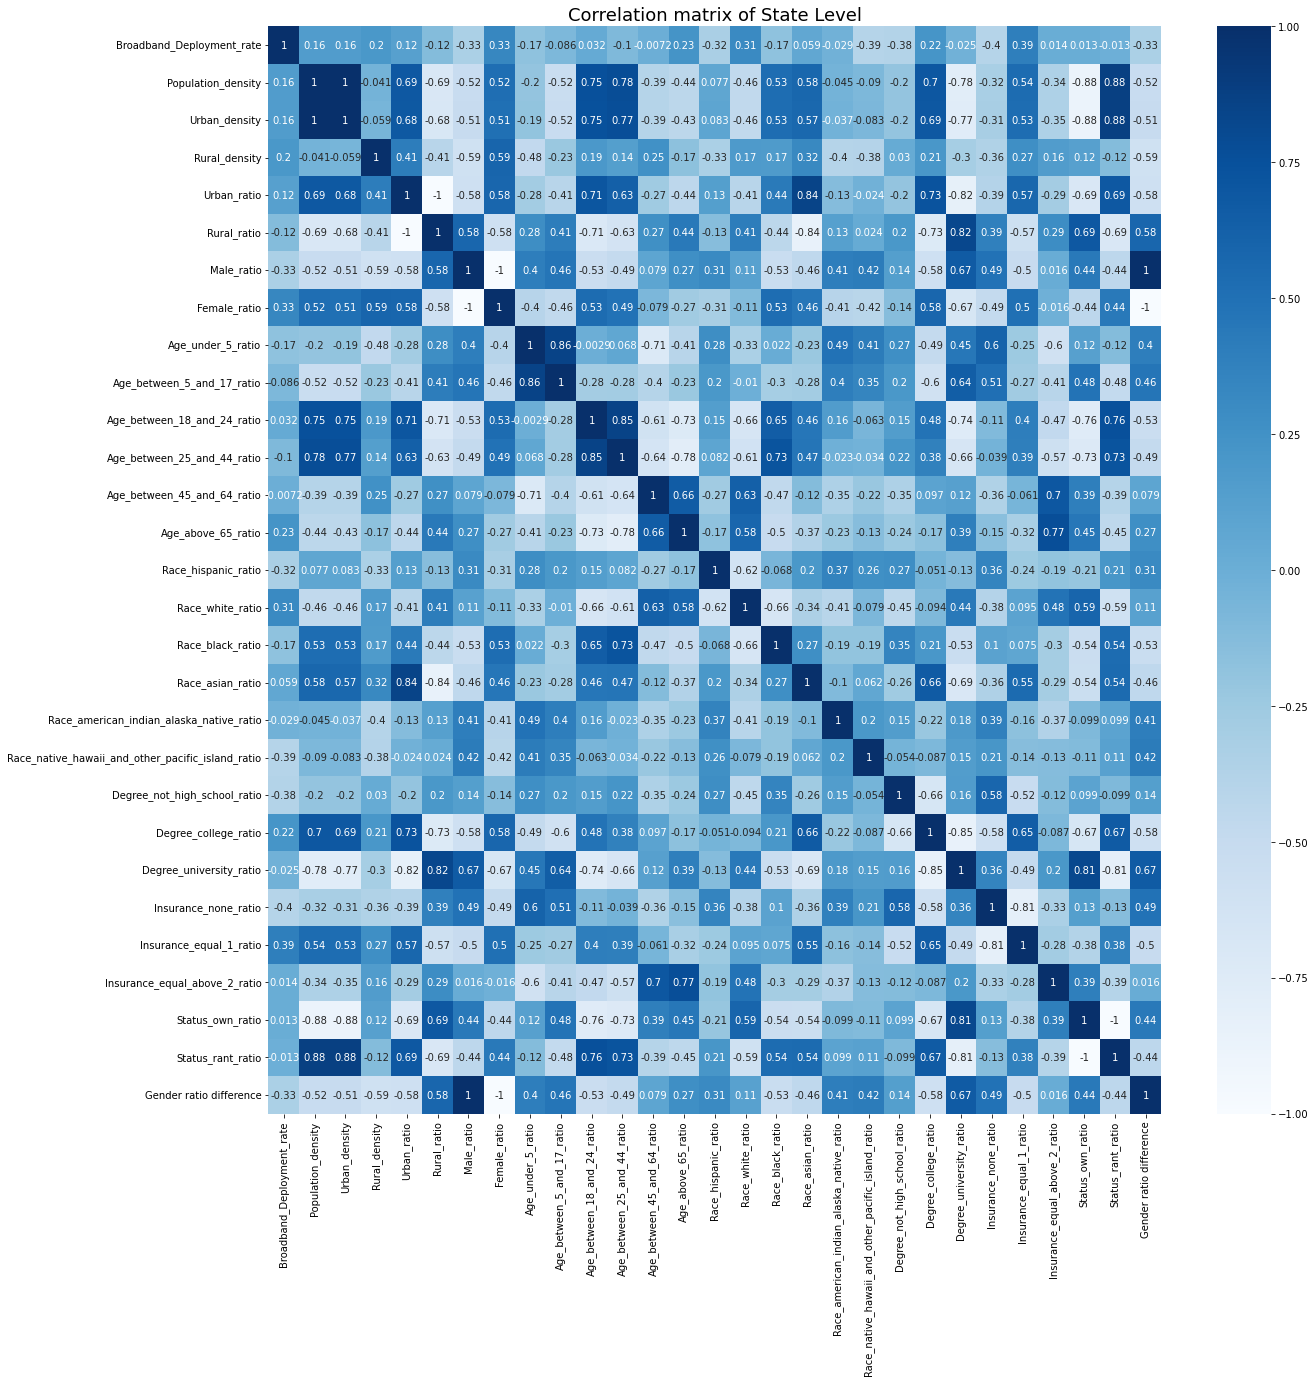

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(data_state2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of State Level", fontdict = {'fontsize' : 18})
plt.show()

In [50]:
data_state2.corr().iloc[0].sort_values(ascending=False)[:11]

Broadband_Deployment_rate    1.000000
Insurance_equal_1_ratio      0.394680
Female_ratio                 0.332299
Race_white_ratio             0.307639
Age_above_65_ratio           0.230482
Degree_college_ratio         0.221973
Rural_density                0.199175
Population_density           0.162454
Urban_density                0.158886
Urban_ratio                  0.122066
Race_asian_ratio             0.058730
Name: Broadband_Deployment_rate, dtype: float64

From corelation table, the five most corelated to deloyment rate features are Insurance_equal_1_ratio, Female_ratio, Race_white_ratio, Age_above_65_ratio, Degree_college_ratio, Degree_college_ratio, Rural_density, Population_density, Urban_density, Urban_ratio, and Race_asian_ratio.

Text(0, 0.5, 'Broadband Deployment Rate')

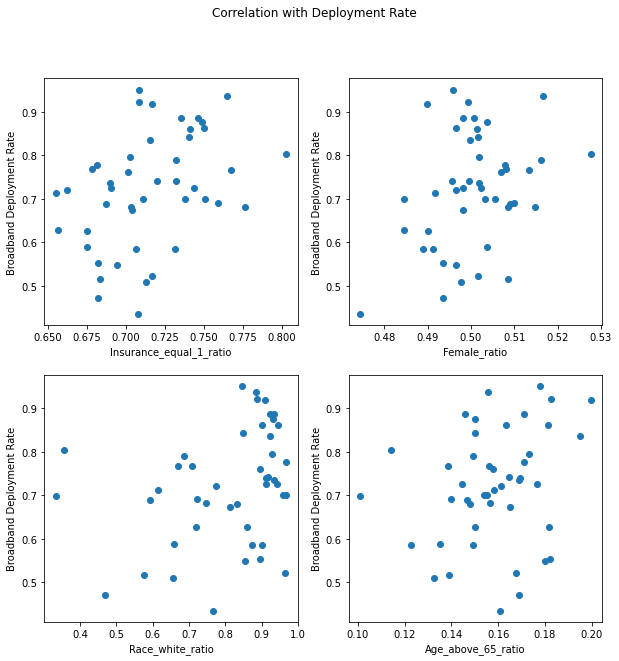

In [58]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_state2['Insurance_equal_1_ratio'],data_state2['Broadband_Deployment_rate'])
ax[0,0].set_xlabel("Insurance_equal_1_ratio")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_state2['Female_ratio'],data_state2['Broadband_Deployment_rate'])
ax[0,1].set_xlabel("Female_ratio")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_state2['Race_white_ratio'],data_state2['Broadband_Deployment_rate'])
ax[1,0].set_xlabel("Race_white_ratio")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_state2['Age_above_65_ratio'],data_state2['Broadband_Deployment_rate'])
ax[1,1].set_xlabel("Age_above_65_ratio")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#ax5.scatter(data_state2['Degree_college_ratio'],data_state2['Broadband_Deployment_rate'])
#ax5.set_xlabel("Degree_college_ratio")
#ax5.set_ylabel("Broadband Deployment Rate")

#### 3. Regression

In [60]:
lr = LinearRegression()
X = data_state2.drop(['Broadband_Deployment_rate'],axis=1)
y = data_state2['Broadband_Deployment_rate']
lr.fit(X,y)

LinearRegression()

In [61]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

,Feature,Coefficients
16,Race_asian_ratio,6.751339
12,Age_above_65_ratio,6.486169
17,Race_american_indian_alaska_native_ratio,5.647613
13,Race_hispanic_ratio,5.599494
14,Race_white_ratio,5.545778
15,Race_black_ratio,5.321838
9,Age_between_18_and_24_ratio,4.117014
21,Degree_university_ratio,1.948897
23,Insurance_equal_1_ratio,1.636949
22,Insurance_none_ratio,0.798053


### County Level

#### 1. Summary

In [62]:
data_county = data.groupby("County_name").mean()
data_county = data_county.sort_values('Broadband_Deployment_rate',ascending=False)
data_county = data_county.reset_index()

In [63]:
data_county.head()

,County_name,Broadband_Deployment_rate,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,Female_ratio,Age_under_5_ratio,...,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio,Gender ratio difference
0,Mellette County,1.0,1.566580,0.000000,1.566580,0.00000,1.00000,0.511719,0.488281,0.094727,...,0.000000,0.098545,0.071102,0.830353,0.352183,0.539187,0.108631,0.672439,0.327561,0.023438
1,Love County,1.0,18.332792,0.000000,18.332792,0.00000,1.00000,0.491351,0.508649,0.065372,...,0.000000,0.088515,0.081125,0.830360,0.123578,0.689175,0.187246,0.769997,0.230003,-0.017298
2,Otoe County,1.0,20.711330,0.000000,14.110122,0.00000,1.00000,0.494345,0.505655,0.060635,...,0.000079,0.038219,0.132285,0.829496,0.043916,0.758775,0.197308,0.766280,0.233720,-0.011310
3,Olmsted County,1.0,220.781785,164.807278,36.634213,0.81814,0.18186,0.488638,0.511362,0.074753,...,0.000403,0.028666,0.225072,0.746263,0.039553,0.787344,0.173103,0.750035,0.249965,-0.022725
4,O'Brien County,1.0,21.091762,0.000000,16.668676,0.00000,1.00000,0.499586,0.500414,0.061040,...,0.000000,0.051298,0.114838,0.833864,0.047190,0.728970,0.223839,0.760370,0.239630,-0.000828


The top five counties with highest deployment rate are Mellette County, Love County, Otoe County, Olmsted County, and O'Brien County.

In [64]:
data_county = data.groupby("County_name").mean()
data_county = data_county.sort_values('Broadband_Deployment_rate')
data_county = data_county.reset_index()
data_county.head()

,County_name,Broadband_Deployment_rate,Population_density,Urban_density,Rural_density,Urban_ratio,Rural_ratio,Male_ratio,Female_ratio,Age_under_5_ratio,...,Race_native_hawaii_and_other_pacific_island_ratio,Degree_not_high_school_ratio,Degree_college_ratio,Degree_university_ratio,Insurance_none_ratio,Insurance_equal_1_ratio,Insurance_equal_above_2_ratio,Status_own_ratio,Status_rant_ratio,Gender ratio difference
0,Glascock County,0.018767,21.441492,0.0,21.441492,0.0,1.0,0.482479,0.517521,0.064568,...,0.000000,0.130483,0.051970,0.817547,0.083049,0.747437,0.169515,0.727194,0.272806,-0.035042
1,Catron County,0.024735,0.538008,0.0,0.538008,0.0,1.0,0.522685,0.477315,0.041074,...,0.000000,0.041228,0.150252,0.808520,0.077054,0.558357,0.364589,0.812535,0.187465,0.045369
2,White Pine County,0.034263,1.054387,0.0,0.602684,0.0,1.0,0.569994,0.430006,0.063796,...,0.000979,0.096421,0.108004,0.795575,0.098111,0.725866,0.176023,0.708040,0.291960,0.139987
3,Upton County,0.035138,2.702761,0.0,2.702761,0.0,1.0,0.499255,0.500745,0.074218,...,0.000000,0.116950,0.053011,0.830040,0.129159,0.756779,0.114062,0.782643,0.217357,-0.001490
4,Echols County,0.036789,9.722965,0.0,9.722965,0.0,1.0,0.505702,0.494298,0.088746,...,0.000252,0.160024,0.049574,0.790403,0.256134,0.571607,0.172258,0.679458,0.320542,0.011403


The top five counties with lowest deployment rate are Glascock County, Catron County, White Pine County, Upton County, and Echols County.

#### 2. Correlation

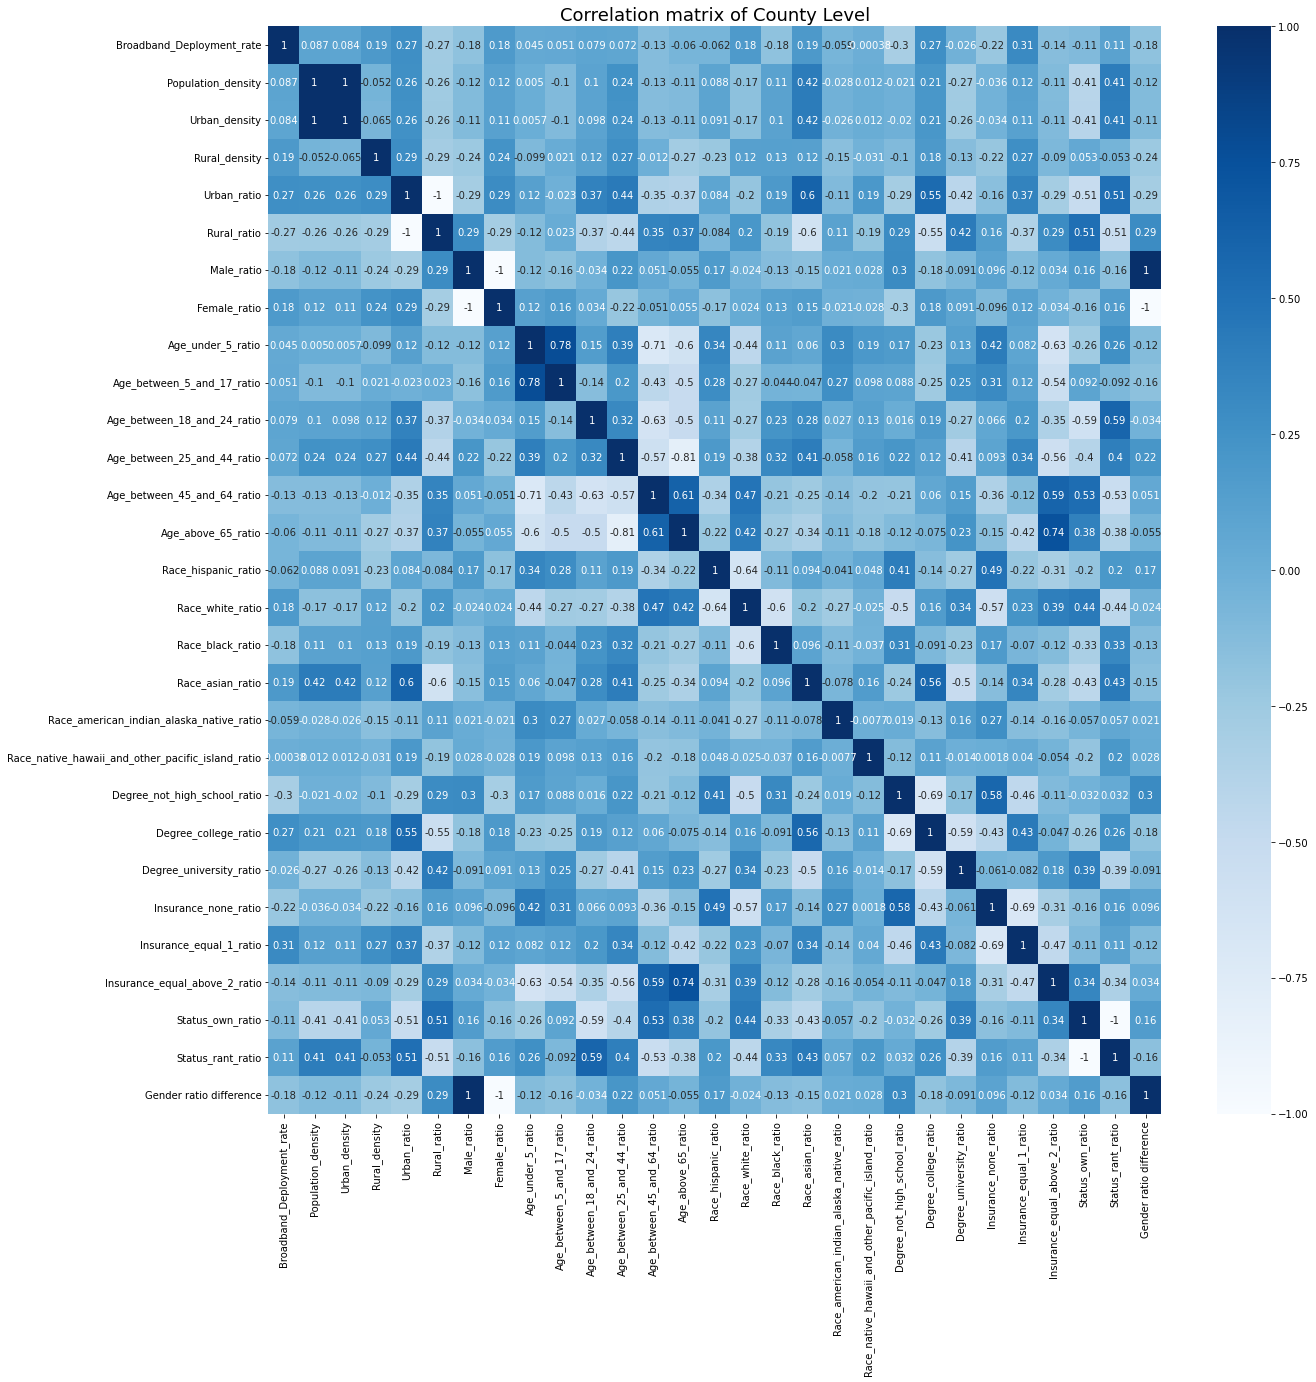

In [66]:
data_county2 = data_county.drop(['County_name'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data_county2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of County Level", fontdict = {'fontsize' : 18})
plt.show()

In [67]:
data_county2.corr().iloc[0].sort_values(ascending=False)[:11]

Broadband_Deployment_rate    1.000000
Insurance_equal_1_ratio      0.310492
Urban_ratio                  0.268830
Degree_college_ratio         0.267515
Rural_density                0.186748
Race_asian_ratio             0.186127
Race_white_ratio             0.176806
Female_ratio                 0.176047
Status_rant_ratio            0.106052
Population_density           0.087151
Urban_density                0.084338
Name: Broadband_Deployment_rate, dtype: float64

Text(0, 0.5, 'Broadband Deployment Rate')

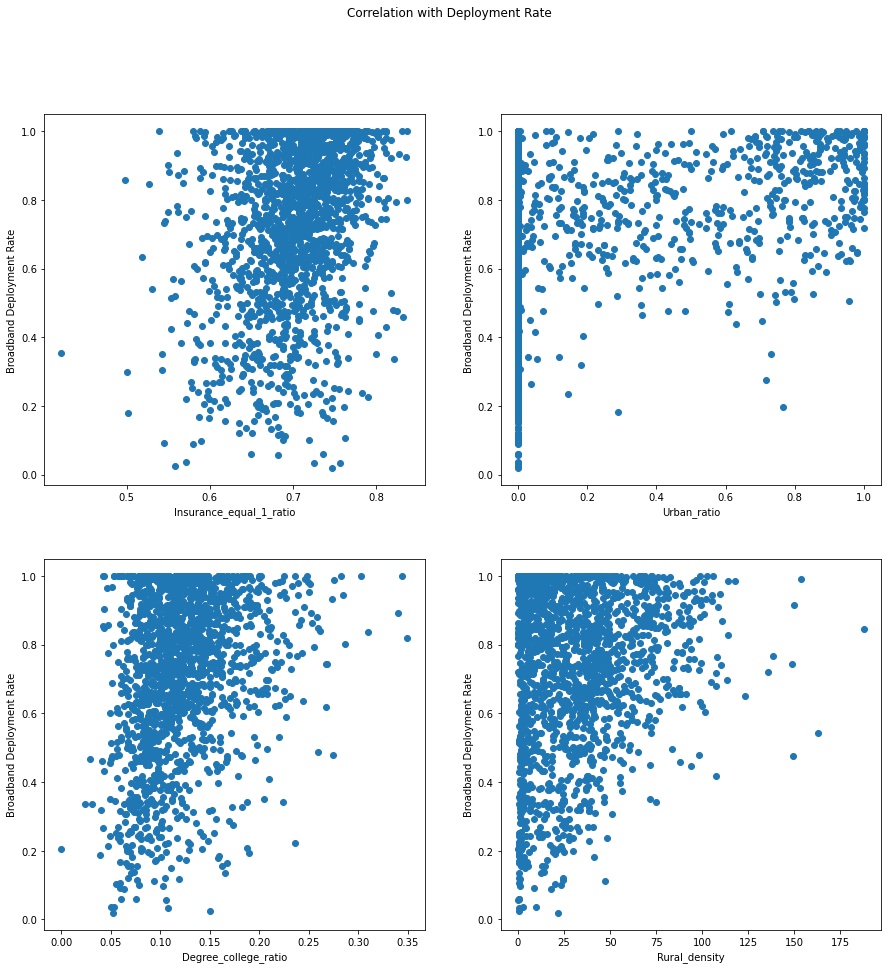

In [69]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_county2['Insurance_equal_1_ratio'],data_county2['Broadband_Deployment_rate'])
ax[0,0].set_xlabel("Insurance_equal_1_ratio")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_county2['Urban_ratio'],data_county2['Broadband_Deployment_rate'])
ax[0,1].set_xlabel("Urban_ratio")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_county2['Degree_college_ratio'],data_county2['Broadband_Deployment_rate'])
ax[1,0].set_xlabel("Degree_college_ratio")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_county2['Rural_density'],data_county2['Broadband_Deployment_rate'])
ax[1,1].set_xlabel("Rural_density")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#### 4. Regression

In [70]:
lr = LinearRegression()
X = data_county2.drop(['Broadband_Deployment_rate'],axis=1)
y = data_county2['Broadband_Deployment_rate']
lr.fit(X,y)

LinearRegression()

In [71]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

,Feature,Coefficients
14,Race_white_ratio,3.438811
16,Race_asian_ratio,3.403259
13,Race_hispanic_ratio,3.384826
17,Race_american_indian_alaska_native_ratio,3.280775
15,Race_black_ratio,3.106202
12,Age_above_65_ratio,1.404986
8,Age_between_5_and_17_ratio,0.622759
23,Insurance_equal_1_ratio,0.563907
21,Degree_university_ratio,0.331218
20,Degree_college_ratio,0.321100
